<a href="https://colab.research.google.com/github/rbarman/GreatReads/blob/master/explorations/Fast_AI_Collab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://docs.fast.ai/collab.html

In [0]:
from fastai.collab import * 

In [2]:
# https://colab.research.google.com/notebooks/io.ipynb#scrollTo=XDg9OBaYqRMd
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
ratings_df = pd.read_parquet('/content/drive/My Drive/part.0.parquet')

# subset to records with a rating
ratings_df = ratings_df[ratings_df['rating'] > 0]

# ratings_df = ratings_df.sample(n=100000)
print(ratings_df.shape)
ratings_df.head()

(1756144, 5)


,user_id,book_id,is_read,rating,is_reviewed
index,,,,,
0,0,948,1,5,0
1,0,947,1,5,1
2,0,946,1,5,0
3,0,945,1,5,0
4,0,944,1,5,0


In [6]:
# Assuming training on 90% of the data and validating on 10%.
train_indices = int(0.9 * ratings_df.shape[0])
train_df = ratings_df.iloc[0:train_indices]
test_df = ratings_df.iloc[train_indices:]
train_df.shape, test_df.shape

((1580529, 5), (175615, 5))

In [4]:
# data = CollabDataBunch.from_df(train_df,test=test_df)
data = CollabDataBunch.from_df(ratings_df)
data.show_batch()

user_id,book_id,target
5827,22150,1.0
901,7902,1.0
4921,527200,1.0
2694,93831,1.0
2586,355754,1.0


In [0]:
learn = collab_learner(data, n_factors=40, y_range=(1,5), metrics=root_mean_squared_error)

epoch,train_loss,valid_loss,root_mean_squared_error,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


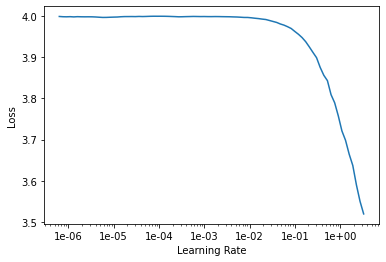

In [9]:
learn.lr_find() # find learning rate
learn.recorder.plot() # plot learning rate graph

In [10]:
%%time
learn.fit_one_cycle(10, 1e-1)

epoch,train_loss,valid_loss,root_mean_squared_error,time
0,0.037990,0.036996,0.183172,05:16
1,0.063486,0.060428,0.236171,05:17
2,0.077217,0.074106,0.262241,05:18
3,0.069409,0.071506,0.257659,05:17
4,0.062984,0.065920,0.247009,05:17
5,0.059062,0.057452,0.229932,05:15
6,0.044252,0.047791,0.209172,05:16
7,0.037522,0.039808,0.190043,05:16
8,0.027973,0.034978,0.177924,05:15
9,0.003195,0.035697,0.180469,05:15


CPU times: user 35min 7s, sys: 15min 12s, total: 50min 20s
Wall time: 52min 46s


.18 RMSE is really good...

In [46]:
preds, y = learn.get_preds()
e = abs(preds-y).tolist()
np.mean(e), max(e),min(e)

(0.054629137641005014, 2.0, 0.0)

(array([3.21683e+05, 1.06570e+04, 6.73400e+03, 5.18200e+03, 3.87700e+03, 2.26200e+03, 7.32000e+02, 8.50000e+01,
        1.30000e+01, 3.00000e+00]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

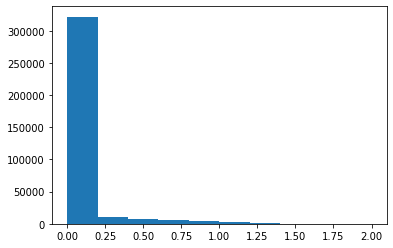

In [47]:
plt.hist(e)

Almost seems too good to be true...